In [6]:
import numpy as np
from scipy.io import loadmat, wavfile
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
from Signal_Analysis.features.signal import get_F_0, get_HNR
from importlib import reload

# tools work in progress
import tools
reload(tools)
from tools import *

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

In [7]:
Fs, x= wavfile.read("AmericanEnglish.wav")
x = x.astype(np.float64)
x /= x.std()
print(f"Fs= {Fs}")
tt = np.linspace(0, len(x) / Fs, len(x))

Fs= 8000


In [8]:
fl = int(0.09*Fs)
frames, frames_idx = split_frames(x,fl,Fs)
tt_frames = tt[frames_idx[:, int(frames_idx.shape[1] / 2)]]

frame length    : 720 samples
frame length    : 0.09 seconds
number of frames: 583


## Compute HNR

In [9]:
hnr_frames = []
for f in frames:
    hnr_frames.append(get_HNR(f,Fs,silence_threshold=0.5))

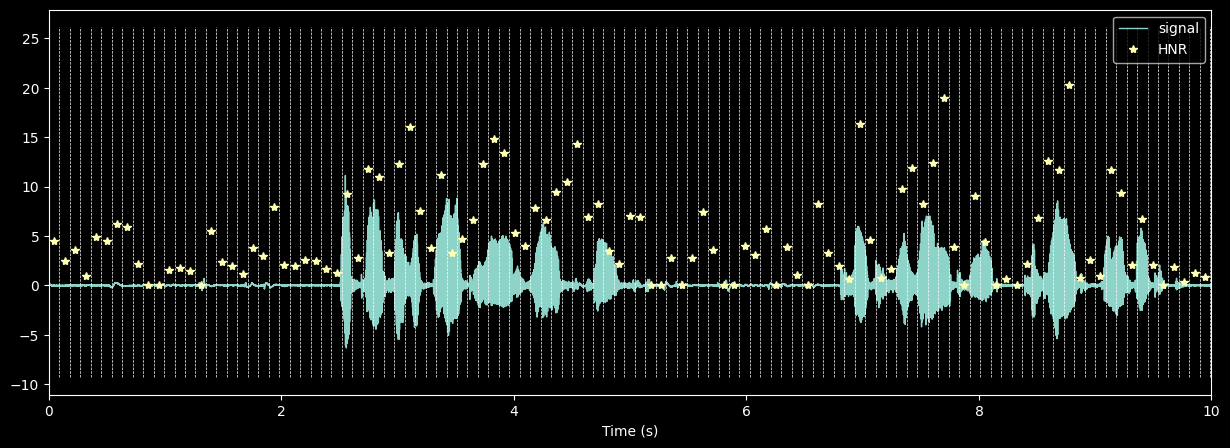

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(tt, x, linewidth=1, label="signal")
plt.xlabel("Time (s)")
plt.plot(tt_frames, hnr_frames, "*", label="HNR")
ymin, ymax = plt.ylim()
plt.vlines(tt[frames_idx[:, 0]], ymin, ymax, linestyles="dashed")
plt.xlim(0, 10)
plt.legend()
plt.show()

## Sort frames by harmonic content

In [11]:
fade = np.hamming(frames.shape[1]) ** 0.1

idx_sort = np.argsort(hnr_frames)
x_sorted = (frames * fade)[idx_sort].reshape(-1)
wavfile.write("output_HNRsplit/x_sorted.wav", int(Fs), wavScaler(x_sorted))

## Find peaks

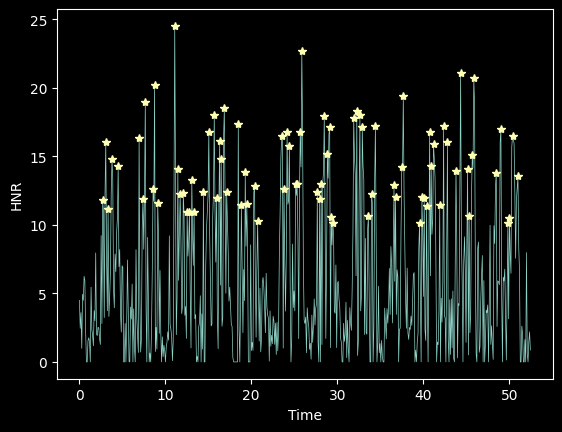

In [12]:
min_h = 10

peaks, peaks_prop = signal.find_peaks(
    hnr_frames,
    height=min_h,
)

#print(peaks_prop.keys())
plt.figure()
plt.plot(tt_frames, hnr_frames)

# mark peaks
plt.plot(tt_frames[peaks], peaks_prop["peak_heights"], "*")
plt.xlabel("Time")
plt.ylabel("HNR")
plt.show()

In [15]:
x_peaks = frames[peaks].reshape(-1)
wavfile.write("output_HNRsplit/x_peaks.wav", int(Fs), wavScaler(x_peaks))